# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
#city_url = url + f'q={city}&units=metric&appid={weather_api_key}'
    
#response = requests.get(url).json()
#response

#         city_lat = response['coord']['lat']
#         city_lng = response['coord']['lon']
#         city_max_temp = response['main']['temp_max']
#         city_humidity = response['main']['humidity']
#         city_clouds = response['clouds']
#         city_wind = response['wind'] 
#         city_country = response['sys']['country']
#         city_date = response['sys']['sunrise']



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    city_weather = requests.get(city_url).json()
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [2]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       559
Date          563
dtype: int64

In [3]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,23.08,97,89,2.60,IN,1696290704
1,camana,-16.6228,-72.7111,19.47,77,24,3.39,PE,1696242749
2,atamyrat,37.8357,65.2106,19.20,19,0,2.59,TM,1696296948
3,manavalakurichi,8.1333,77.3000,25.45,90,100,4.34,IN,1696293523
4,adamstown,-25.0660,-130.1015,20.31,70,65,10.69,PN,1696256356


In [4]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,23.08,97,89,2.60,IN,1696290704
1,camana,-16.6228,-72.7111,19.47,77,24,3.39,PE,1696242749
2,atamyrat,37.8357,65.2106,19.20,19,0,2.59,TM,1696296948
3,manavalakurichi,8.1333,77.3000,25.45,90,100,4.34,IN,1696293523
4,adamstown,-25.0660,-130.1015,20.31,70,65,10.69,PN,1696256356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

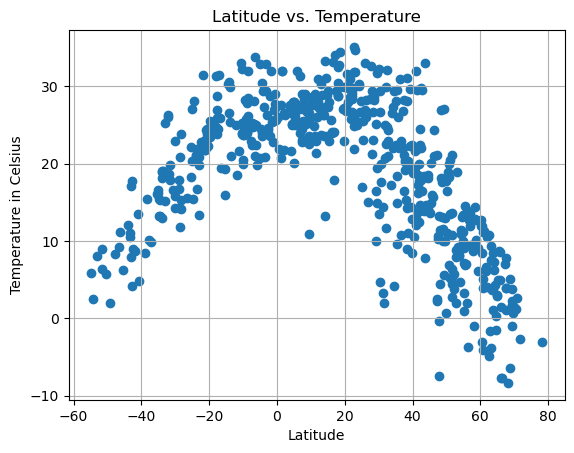

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.ylabel("Temperature in Celsius")
plt.grid()
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

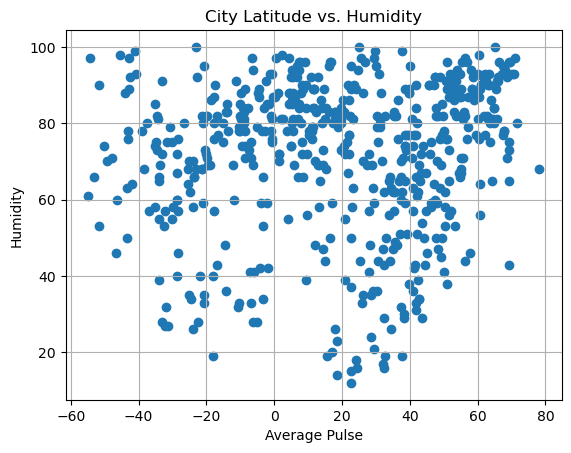

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.ylabel("Humidity")
plt.xlabel("Average Pulse")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

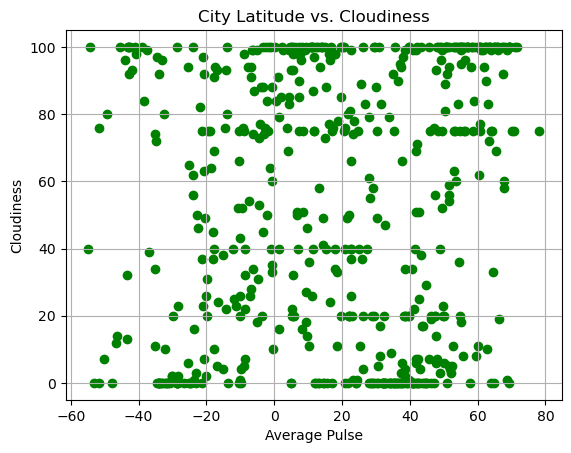

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], color='green')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.ylabel("Cloudiness")
plt.xlabel("Average Pulse")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

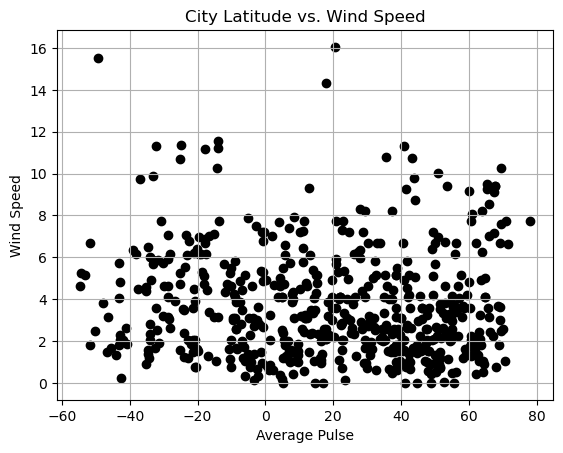

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], color='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.ylabel("Wind Speed")
plt.xlabel("Average Pulse")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

def line_reg(xvalues,yvalues):
    yvalues = yvalues.astype('float')
    xvalues = xvalues.astype('float')
    (slope,intercept, rvalue, pvalue, stderr)=linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(xvalues,regress_values, color='red')
    plt.scatter(xvalues,yvalues)
    print(f'The rvalue is: {rvalue}')
    return line_eq

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]
northern_hemi_df=northern_hemi_df.reset_index()
# Display sample data
northern_hemi_df2 = northern_hemi_df.set_index('City_ID')
northern_hemi_df2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,23.08,97,89,2.60,IN,1696290704
2,atamyrat,37.8357,65.2106,19.20,19,0,2.59,TM,1696296948
3,manavalakurichi,8.1333,77.3000,25.45,90,100,4.34,IN,1696293523
7,hilo,19.7297,-155.0900,27.27,80,100,4.92,US,1696263076
8,ciudad melchor muzquiz,27.8833,-101.5167,32.63,41,61,5.95,MX,1696250349


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df=southern_hemi_df.reset_index()
# Display sample data
southern_hemi_df2 = southern_hemi_df.set_index('City_ID')
southern_hemi_df2.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,camana,-16.6228,-72.7111,19.47,77,24,3.39,PE,1696242749
4,adamstown,-25.0660,-130.1015,20.31,70,65,10.69,PN,1696256356
5,port alfred,-33.5906,26.8910,19.11,69,0,4.90,ZA,1696304843
6,grytviken,-54.2811,-36.5092,2.54,97,100,5.24,GS,1696233012
12,papatowai,-46.5619,169.4708,9.26,46,12,1.48,NZ,1696270260


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.7922725054156126


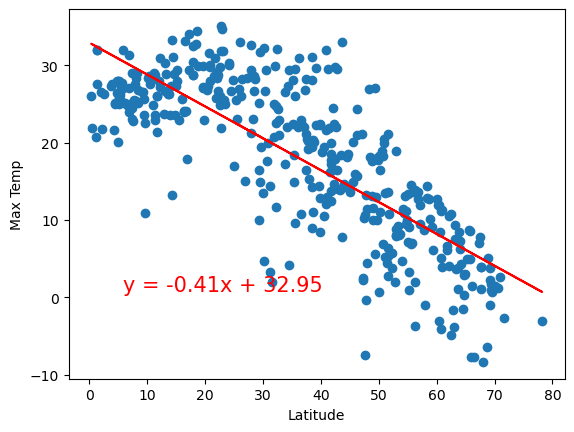

In [37]:
# Linear regression on Northern Hemisphere
xvalues1 = northern_hemi_df2['Lat']
yvalues1 = northern_hemi_df2['Max Temp']
ln_eq=line_reg(xvalues1,yvalues1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(ln_eq, (5.8,0.8),fontsize = 15, color="red")
plt.show()

The rvalue is: 0.816359704864383


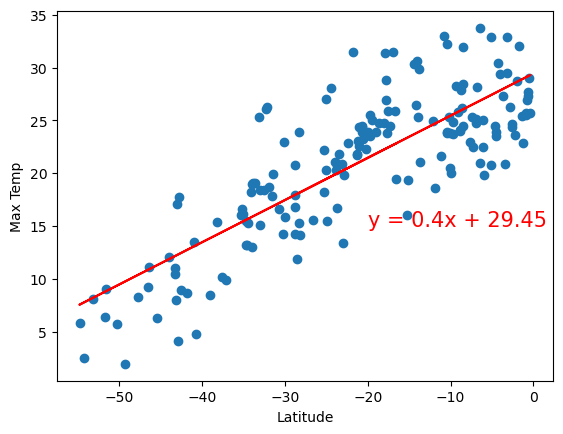

In [47]:
# Linear regression on Southern Hemisphere
xvalues2 = southern_hemi_df2['Lat']
yvalues2 = southern_hemi_df2['Max Temp']
ln_eq=line_reg(xvalues2,yvalues2)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(ln_eq, (-20,15),fontsize = 15, color="red")
plt.show()

**Discussion about the linear relationship:** Based on the r values, there is a tight correlation between temperature and latitude. The lower the Latitude, the higher the temperature will be, making them inversely proportional.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.08349128043536448


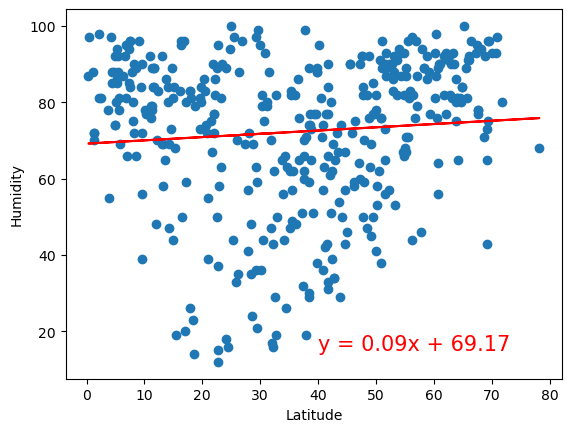

In [49]:
# Northern Hemisphere
xvalues3 = northern_hemi_df2['Lat']
yvalues3 = northern_hemi_df2['Humidity']
ln_eq=line_reg(xvalues3,yvalues3)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(ln_eq, (40,15),fontsize = 15, color="red")
plt.show()


The rvalue is: 0.0445901695532549


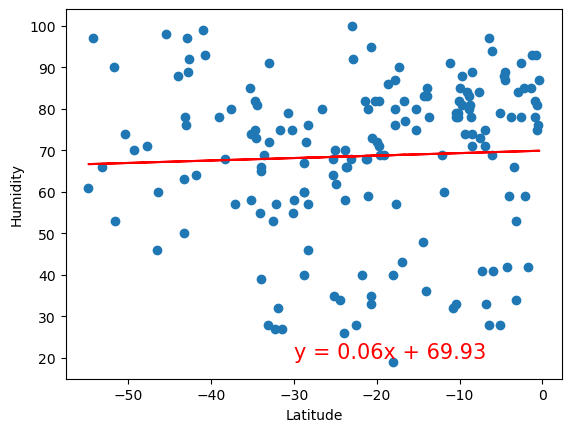

In [53]:
# Southern Hemisphere
xvalues4 = southern_hemi_df2['Lat']
yvalues4 = southern_hemi_df2['Humidity']
ln_eq=line_reg(xvalues4,yvalues4)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(ln_eq, (-30,20),fontsize = 15, color="red")
plt.show()

**Discussion about the linear relationship:** Based on the r values and how spread the dots are, we can conclude that humidity and latitude do not possess a correlation. There could be any other factors such as weather, terrain features,etc.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.09580455903425361


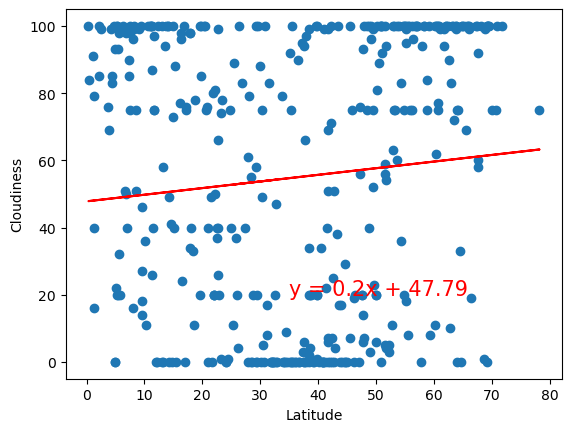

In [57]:
# Northern Hemisphere
xvalues5 = northern_hemi_df2['Lat']
yvalues5 = northern_hemi_df2['Cloudiness']
ln_eq=line_reg(xvalues5,yvalues5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(ln_eq, (35,20),fontsize = 15, color="red")
plt.show()

The rvalue is: 0.11639665323388795


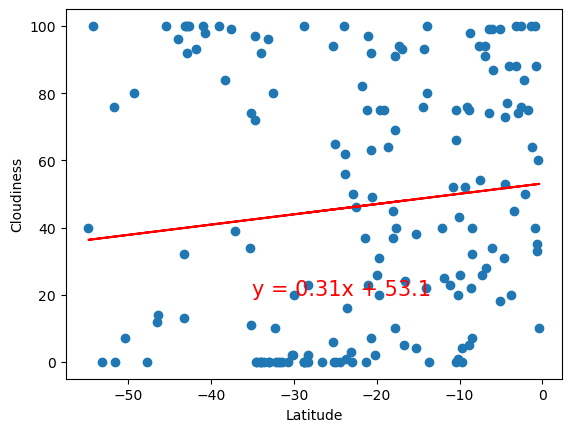

In [60]:
# Southern Hemisphere
xvalues6 = southern_hemi_df2['Lat']
yvalues6 = southern_hemi_df2['Cloudiness']
ln_eq=line_reg(xvalues6,yvalues6)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(ln_eq, (-35,20),fontsize = 15, color="red")
plt.show()

**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude based on the r values and visualization of the plot. There could be another factors (e.g humidity)

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.051236660631585454


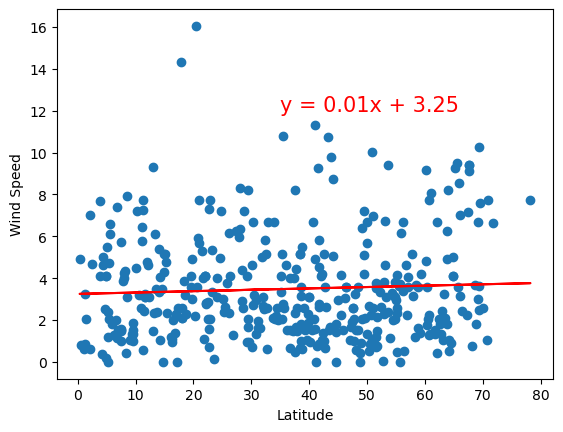

In [62]:
# Northern Hemisphere
xvalues7 = northern_hemi_df2['Lat']
yvalues7 = northern_hemi_df2['Wind Speed']
ln_eq=line_reg(xvalues7,yvalues7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(ln_eq, (35,12),fontsize = 15, color="red")
plt.show()

The rvalue is: -0.09631377130658716


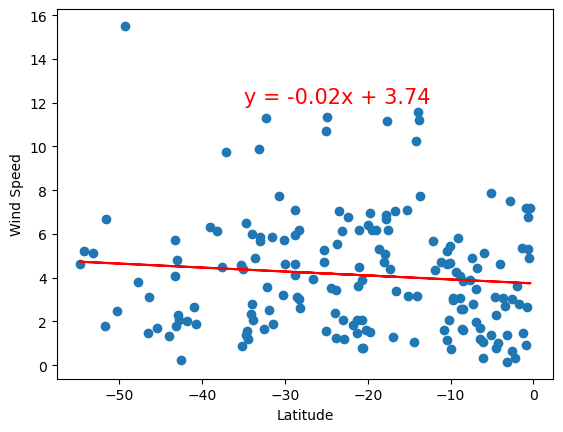

In [80]:
# Southern Hemisphere
xvalues8 = southern_hemi_df2['Lat']
yvalues8 = southern_hemi_df2['Wind Speed']
ln_eq=line_reg(xvalues8,yvalues8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(ln_eq, (-35,12),fontsize = 15, color="red")
plt.show()

**Discussion about the linear relationship:** Eventhough the plot seems clustered, there is no correlation between latitude and windspeed. A good variable to correlate wind speed could be the altitude of highest point per country and compare it with wind speed.